In [1]:
import nltk
# nltk.download()

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid= SentimentIntensityAnalyzer()

In [3]:
import numpy as np 
import pandas as pd
import string 
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import wordcloud
import warnings
import re 
%matplotlib inline


In [27]:
data= pd.read_csv('Elon_Musk.csv', encoding='ISO-8859-1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,1996,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [28]:
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [29]:
data=data.drop(['Unnamed: 0'],axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
...,...
1994,"@flcnhvy True, it sounds so surreal, but the negative propaganda is still all out there &amp; easy to find in social me https://t.co/WJRzIbKh1H"
1995,@PPathole Make sure to read ur terms &amp; conditions before clicking accept!
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>


In [30]:
text=' '.join(data['Text'])
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [31]:
data = [Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
data = [Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [32]:
no_punc_text=text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [10]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
len(text_tokens)

21078

In [39]:
my_stop_words=stopwords.words('english')
my_stop_words.append('the')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]

print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [40]:
lower_words=[text.lower() for x in no_stop_tokens]
print(lower_words[0:25])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [43]:
!pip install spacy download en
import en_core_web_sm

  Created wheel for en: filename=en-0.0.1-py3-none-any.whl size=1151 sha256=d7dca666c76ce002c2d66d0c1ee07b20defcfea4f8a4a7007f5e1b2f6ec03a0f
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\de\60\29\dd935b7613b59558342edabe88c2c644025417901252423efc
Successfully built en


You should consider upgrading via the 'c:\users\lenovo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [44]:
nlp = spacy.load('en_core_web_sm')

In [45]:
doc=nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [46]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


# Feature Extraction

In [47]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer=CountVectorizer()
Text = vectorizer.fit_transform(lemmas)

In [48]:
print(vectorizer.vocabulary_)

{'kunalb11': 2713, 'alien': 231, 'idaacarmack': 2450, 'ray': 3636, 'trace': 4512, 'cyberpunk': 967, 'hdr': 1687, 'nextlevel': 3172, 'have': 1681, 'try': 4549, 'joerogan': 2632, 'spotify': 4135, 'great': 1620, 'interview': 2560, 'gtera27': 1639, 'doge': 1121, 'underestimate': 4681, 'teslacn': 4359, 'congratulations': 863, 'tesla': 4353, 'china': 745, 'amazing': 257, 'execution': 1333, 'last': 2733, 'year': 4953, 'now': 3211, 'next': 3171, 'even': 1305, 'happy': 1668, 'new': 3168, 'ox': 3328, 'httpstco9wfkmyu2oj': 1876, 'frodo': 1503, 'underdoge': 4680, 'all': 234, 'thought': 4439, 'would': 4930, 'fail': 1369, 'himself': 1732, 'httpstcozgxjfdzzrm': 2409, 'owensparks': 3325, 'flcnhvy': 1445, 'anonyx10': 286, 'haha': 1654, 'thank': 4397, 'indeed': 2499, 'tweet': 4570, 'definitely': 1022, 'represent': 3720, 'realworld': 3661, 'time': 4456, 'allocation': 236, 'the': 4405, 'entertaining': 1261, 'outcome': 3305, 'likely': 2795, 'givedirectly': 1589, 'just': 2660, 'sent': 3911, 'agree': 200, 'c

In [49]:
print(vectorizer.get_feature_names()[50:100])
print(Text.toarray()[50:100])

['23', '230', '24', '240am', '247teslanew', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngrams=vectorizer_ngram_range.fit_transform(data)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)

tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(data)

print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'dmc_ryan', 'do', 'does', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'dragon'

# GENERATING WORD_CLOUD

In [58]:
from wordcloud import WordCloud,STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off');

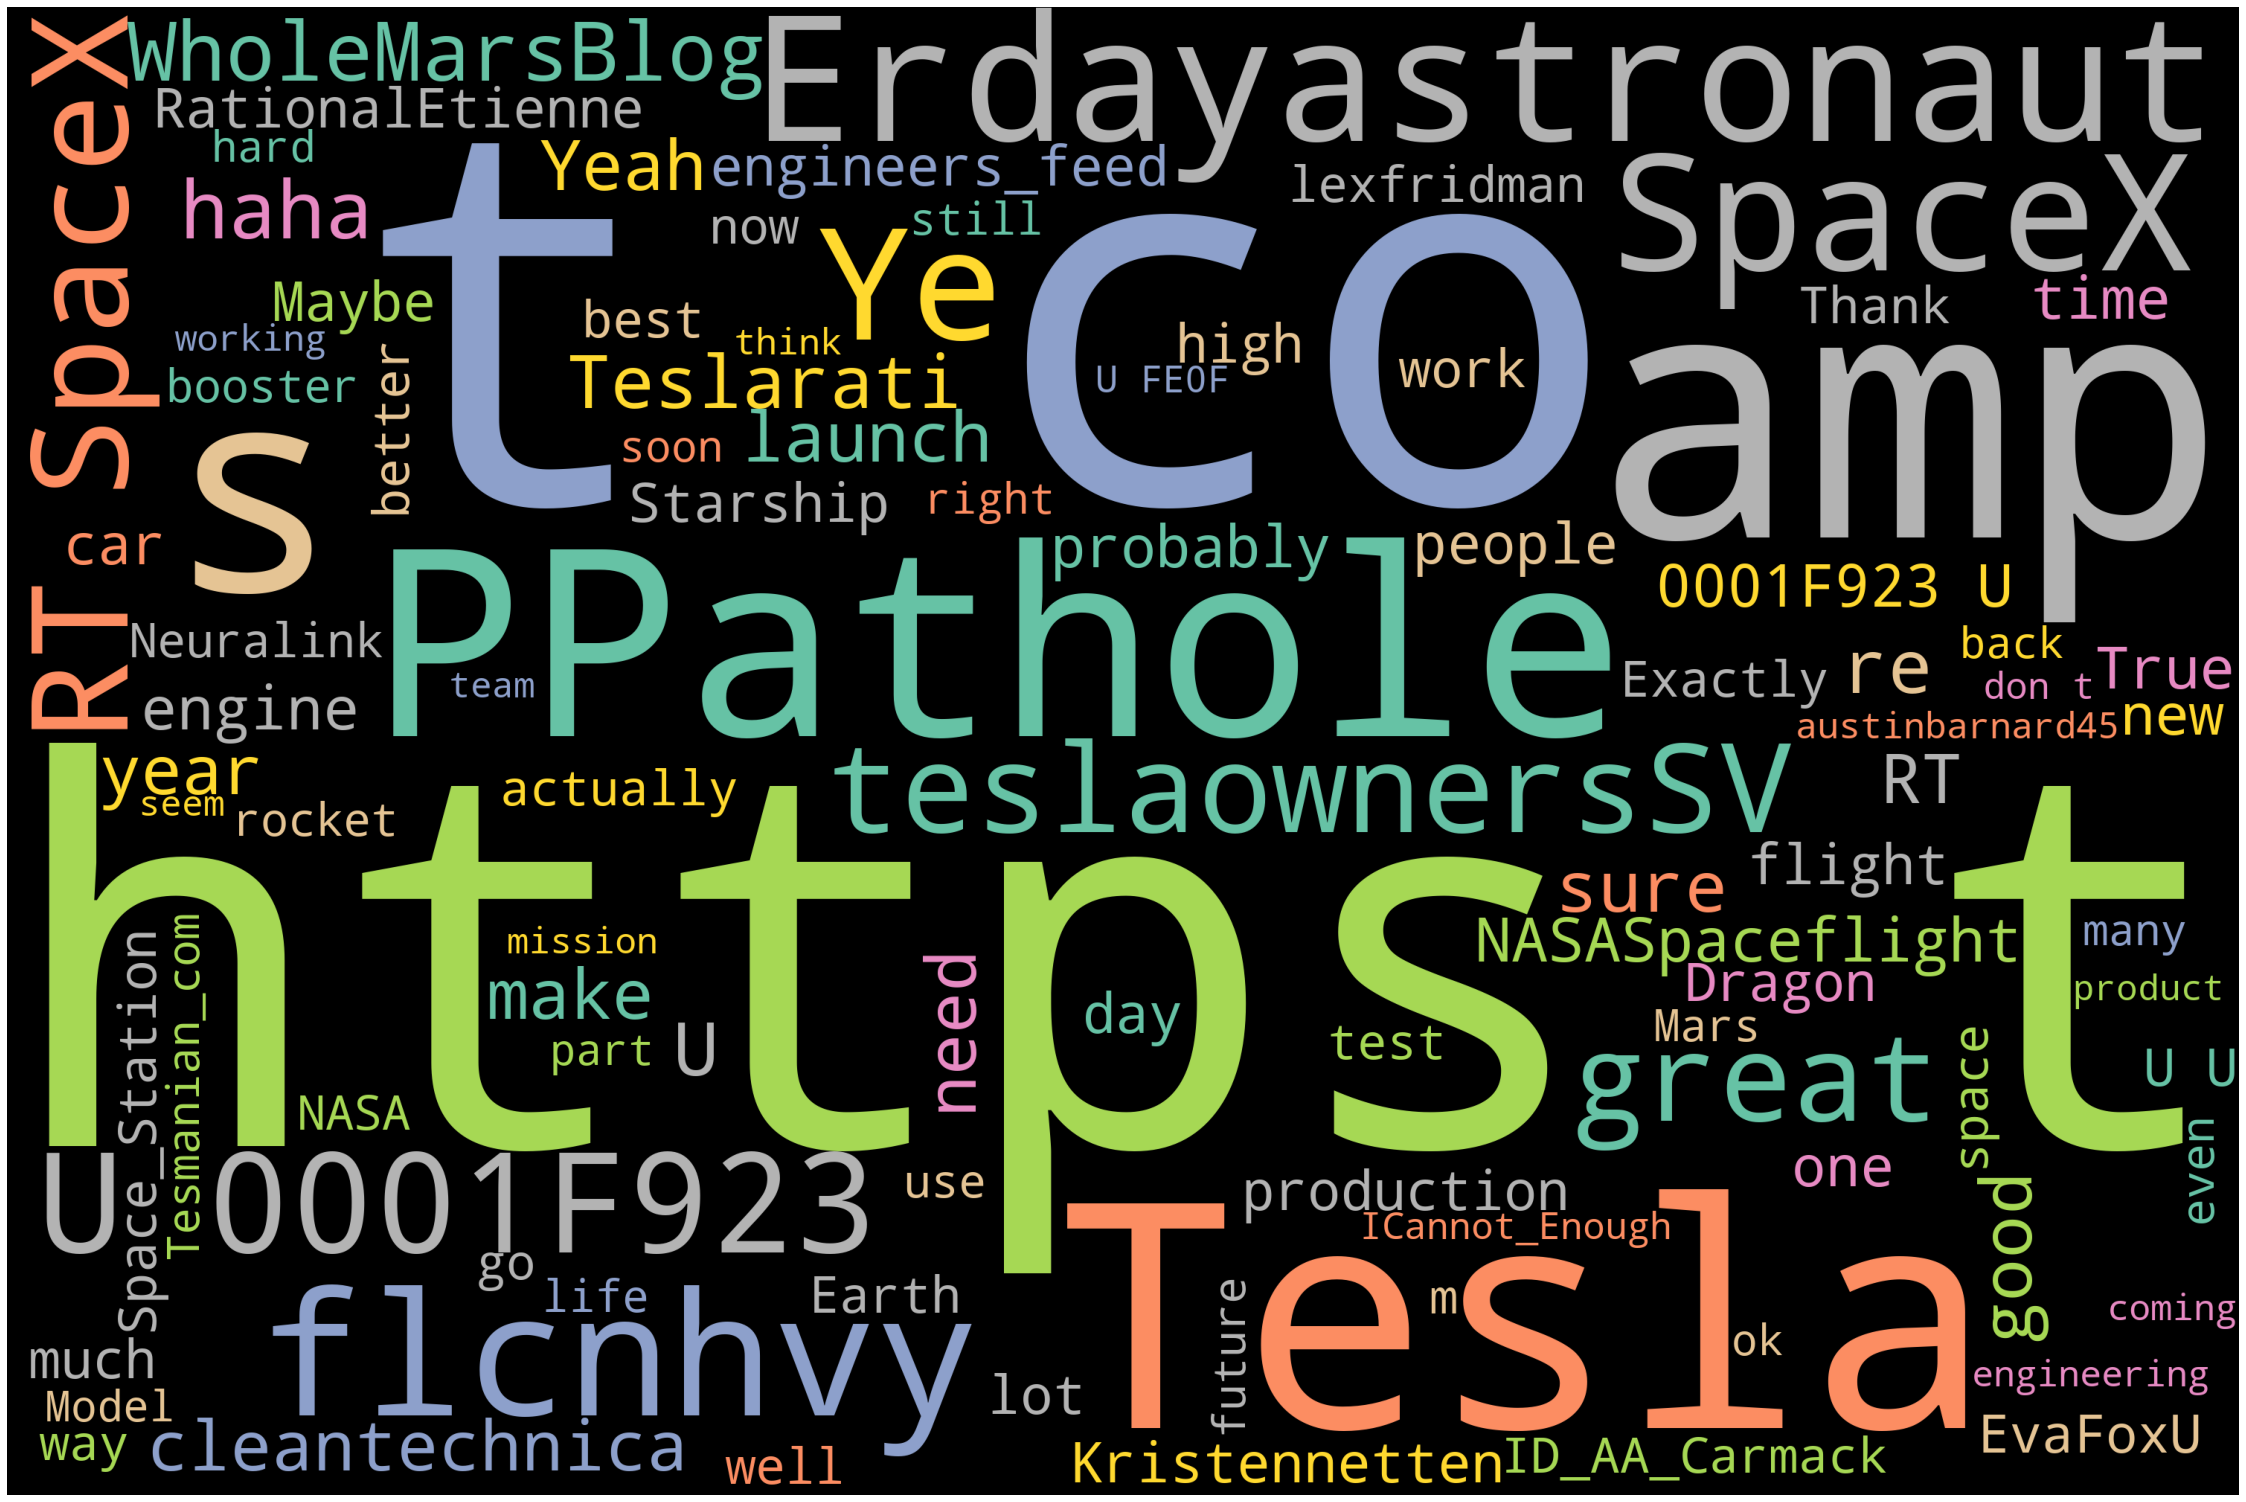

In [65]:
stopwords=STOPWORDS
stopwords.add('will')
wordcloud=WordCloud(width=3000, height= 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)